In [79]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
print(tf.__version__)

1.9.0


In [33]:
x_data = np.linspace(0.0,10.0,1000000)

In [42]:
noise = np.random.rand(len(x_data))

In [43]:
y_true = (0.5*x_data) + 5 + noise

In [44]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [45]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [46]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [47]:
my_data = pd.concat([x_df, y_df],axis=1)

In [48]:
my_data.head()

,X Data,Y
0,0.00000,5.217691
1,0.00001,5.338948
2,0.00002,5.195310
3,0.00003,5.797529
4,0.00004,5.108289


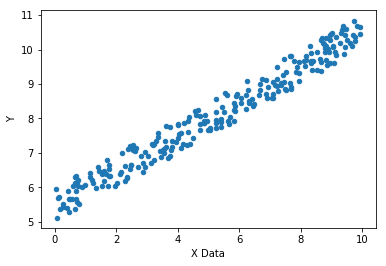

In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [50]:
feat_cols =[ tf.feature_column.numeric_column('x', shape=[1]) ]

In [51]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xd312b27d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN', '_train_distribute': None, '_save_summary_steps': 100}


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [54]:
print(x_train.shape)

(700000,)


In [56]:
x_eval.shape

(300000,)

In [57]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                               batch_size=8,num_epochs=None,shuffle=True)

In [58]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                               batch_size=8,num_epochs=1000,shuffle=False)

In [59]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,
                                               batch_size=8,num_epochs=1000,shuffle=False)

In [60]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN/model.ckpt.
INFO:tensorflow:loss = 413.90015, step = 1
INFO:tensorflow:global_step/sec: 486.119
INFO:tensorflow:loss = 19.27849, step = 101 (0.207 sec)
INFO:tensorflow:global_step/sec: 819.666
INFO:tensorflow:loss = 14.453541, step = 201 (0.124 sec)
INFO:tensorflow:global_step/sec: 808.963
INFO:tensorflow:loss = 11.8185425, step = 301 (0.122 sec)
INFO:tensorflow:global_step/sec: 744.485
INFO:tensorflow:loss = 9.038031, step = 401 (0.135 sec)
INFO:tensorflow:global_step/sec: 766.389
INFO:tensorflow:loss = 2.5335839, step = 501 (0.131 sec)
INFO:tensorflow:global_step/sec: 314.664
INFO:tensorflow:loss = 5.763574, step = 601 (0.317 sec)
INFO:tensorflow:g

In [61]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-20-16:00:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-20-16:00:11
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.18102825, global_step = 1000, loss = 1.448226
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/fo

In [62]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-20-19:22:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-20-19:22:03
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.17924385, global_step = 1000, loss = 1.4339508
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/f

In [65]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 0.18102825, 'global_step': 1000, 'loss': 1.448226}


In [66]:
print('Evaluation Data Metrics')
print(eval_metrics)

Evaluation Data Metrics
{'average_loss': 0.17924385, 'global_step': 1000, 'loss': 1.4339508}


In [67]:
new_data = np.linspace(0,10,10)

In [69]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [72]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.8892527], dtype=float32)},
 {'predictions': array([5.5542226], dtype=float32)},
 {'predictions': array([6.2191925], dtype=float32)},
 {'predictions': array([6.8841624], dtype=float32)},
 {'predictions': array([7.5491323], dtype=float32)},
 {'predictions': array([8.214102], dtype=float32)},
 {'predictions': array([8.879072], dtype=float32)},
 {'predictions': array([9.544042], dtype=float32)},
 {'predictions': array([10.209012], dtype=float32)},
 {'predictions': array([10.873981], dtype=float32)}]

In [74]:
predictions=[]

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmptuzSsN/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [75]:
predictions

[array([4.8892527], dtype=float32),
 array([5.5542226], dtype=float32),
 array([6.2191925], dtype=float32),
 array([6.8841624], dtype=float32),
 array([7.5491323], dtype=float32),
 array([8.214102], dtype=float32),
 array([8.879072], dtype=float32),
 array([9.544042], dtype=float32),
 array([10.209012], dtype=float32),
 array([10.873981], dtype=float32)]

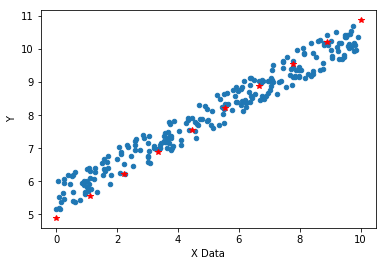

In [81]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(new_data,predictions,'r*')